# Pytorch workflow diagram
1. Get data ready - turn into tensors
2. Build or pick a pretrained model (to suit your problem): a) Pick a loss funcitno and optimizer  - b) build a training loop.
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model


In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (influence)",
                      5: "saving and loading model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (influence)',
 5: 'saving and loading model',
 6: 'putting it all together'}

In [2]:
import torch
# nn contains all of PyTorch's building block for neural networks
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # some good plotting

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

torch.__version__

Using device: cpu


'2.3.0+cu121'

## Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or prodcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patters in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias  = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets (one of the most important concepts in maching learning)

Let's create a training and test set with our data

In [5]:
# create a train/test split
train_split = int(0.8 * len(X)) # 80% of the X data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [37]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  fig, ax = plt.subplots(1,1, figsize=(6, 6))
  # plot training data
  ax.scatter(train_data, train_labels, s=20, label="Training data", edgecolors='blue', facecolors='none', marker='o')
  # plot test data
  ax.scatter(test_data, test_labels, s=20, label="Testing data", edgecolors='green', facecolors='none', marker='o')
  # are there predictions?
  if predictions is not None:
    # plot the predictions if they exist
    ax.scatter(test_data, predictions, s=20, label="Prediction", edgecolors='red', facecolors='none', marker='o')

  for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

  ax.set_xlim(-0.1, 1.1)
  ax.set_xticks(np.arange(0, 1.1, 0.2))
  ax.set_xlabel("x")

  ax.set_ylim(-0.1, 1.1)
  ax.set_yticks(np.arange(0, 1.1, 0.2))
  ax.set_ylabel("y")

  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  ax.tick_params(direction='in', top=True)
  ax.tick_params(which='major', length=5, right=5, width=1)
  ax.tick_params(direction='in', top=True, left=True, right=True, which='minor', length=3, width=0.8)

  leg = plt.legend(loc='best', labelspacing = 1.2, fontsize=12)
  leg.get_frame().set_linewidth(1.5)
  leg.get_frame().set_edgecolor("black")

  ax.grid(True, alpha=0.3)

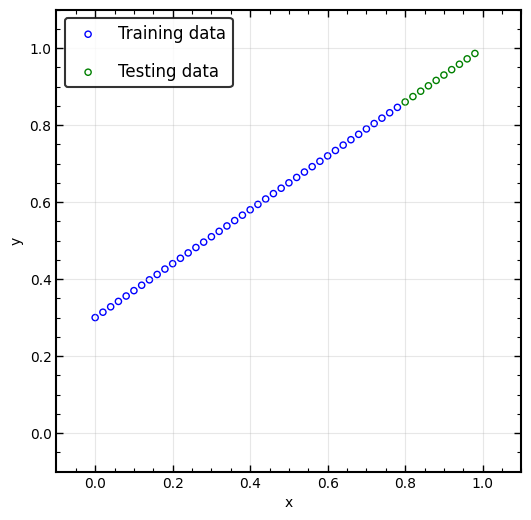

In [38]:
plot_predictions();

## 2. Build model

Our first PyTorch model
Linear regression model

What our model does:
* Start with random values
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and bias values we used to create the data)

How does it do so?
Through two main algorithms
1. Gradient descent
2. Backpropogation


In [8]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  # <- almost everything in Pythorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula

## PyTorch model building essentials

* torch.nn - contains all of the building for computational gradphs (a neural network can be considered a computational approach)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn. will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this where the optimizes in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subsclasses require you to overwrite forward(),

Check the pytorch cheat sheet https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside

So we can check our model parameters or what's inside our model using -parameter()

In [9]:
# Create a random seed
torch.manual_seed(42)
# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it is going to run it though the `forfard()` method

In [11]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

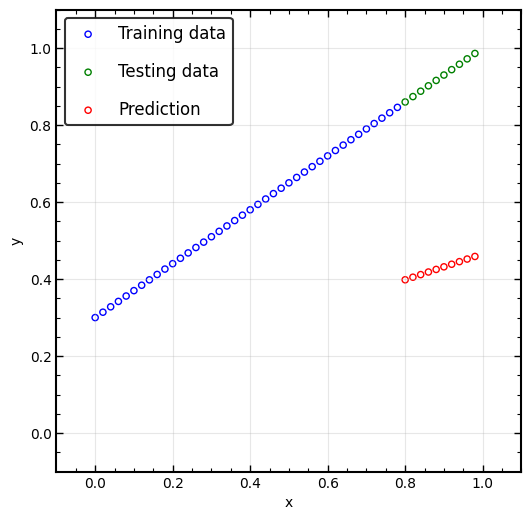

In [39]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.
Or in ohter words from a poor representation of the data to a better representation of the data

One way to measure  how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** takes into account the loss of a model and adjusts the model's predictions (e.g. weight and bias) to improve the loss function. https://pytorch.org/docs/stable/optim.html#module-torch.optim

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [13]:
# check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr=learning rate = probably the most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you will get an idea of what works and what does not with you particular problem set. For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will sufficient. However, for a classifiction problem like classifying whether a photo is of a dog or a cat, you will likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving though our model's `forwar()` functions) - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards though the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimizer step - use the optimizer to adjust our models parameters to try and improve the loss (**gradient descent**)                  

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# an epoch is one loop through the data...
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop though the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # sets all parameters that require gradients to require

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate a loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss wrt to parameters of the model
  loss.backward()

  #5. Step the optimizer, perform the gradient descent
  optimizer.step() # by default how the optimizer changes will accumulate through the loop

  ### Testing
  model_0.eval() # turns off different settings not needed for testing
  with torch.inference_mode():# turn off gradient tracking
    # do the forward pass
    test_pred = model_0(X_test)
    # 2- calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

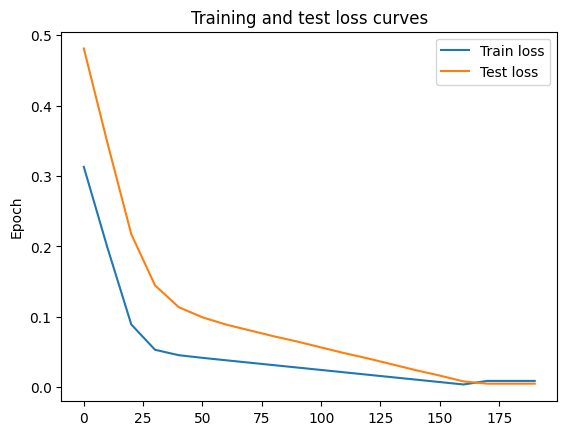

In [17]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend();

In [18]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [19]:
weight, bias

(0.7, 0.3)

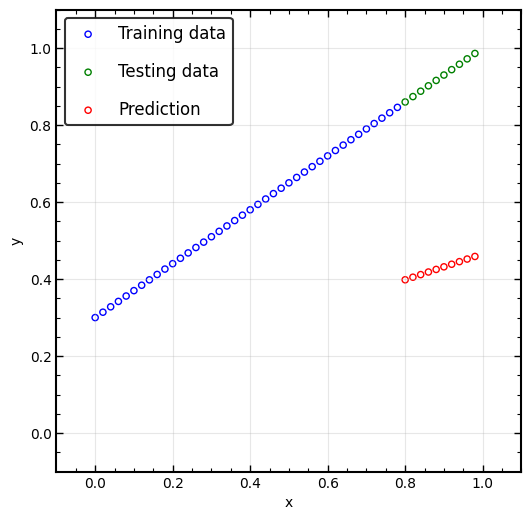

In [40]:
plot_predictions(predictions=y_preds)

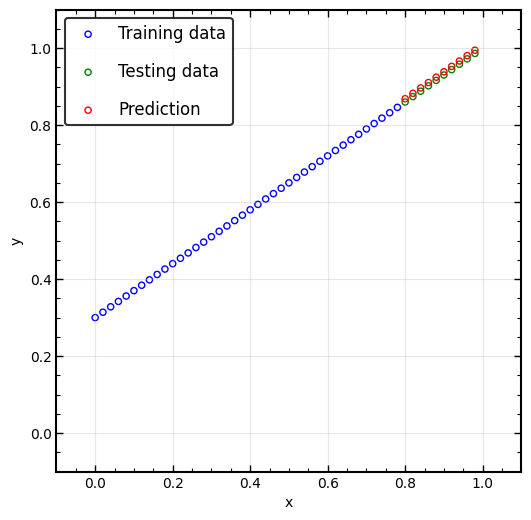

In [41]:
plot_predictions(predictions=y_pred_new)

### Saving the PyTorch model

There are three main method for saving and loading with PyTorch

1. `torch.save()` allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` allows to load model's saved state dictionary.

check this (Save & Load models) https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [22]:
# saving our pytorch model
from pathlib import Path

# 1. Create a model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Save model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Save model to: models/01_pytorch_model_0.pth


In [23]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1562 Jul  7 07:20 01_pytorch_model_0.pth


### Loading a PyTorch model



In [24]:
# to load in a saved model state_dict() we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# laod the state dict of model 0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### 6. Put it all together
Let's go back through the steps above in one

In [26]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.3.0+cu121'

Create a devive-agnostic code.

this means if we have acces to GPU, our code will use it

if not it uses the default, CPU

In [27]:
# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [28]:
# crate data using linear regression formula y=weight *x + bias
weight=0.7
bias = 0.3

# create range values
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # without unsqueeze errors will pup up
y = weight * X + bias

In [29]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### 6.2 Building a PyTorch linear model

In [30]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

#set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [31]:
# set the model to use the target device
model_1.to(device)
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training

For training we need
* Loss function
* Optimizer
* Training loop
* Testing loop

In [32]:
# setup loss function
loss_fn = nn.L1Loss()
# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [33]:
# train loop
torch.manual_seed(42)
epochs = 200

# Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass
  y_pred = model_1(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Backpropagation
  loss.backward()
  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [34]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Save the model and load

In [35]:
from pathlib import Path
#1. Create models dircetory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#2. Create model to save path
MODEL_NAME = "01_pytorch_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
#2. Save the model state_dict()
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

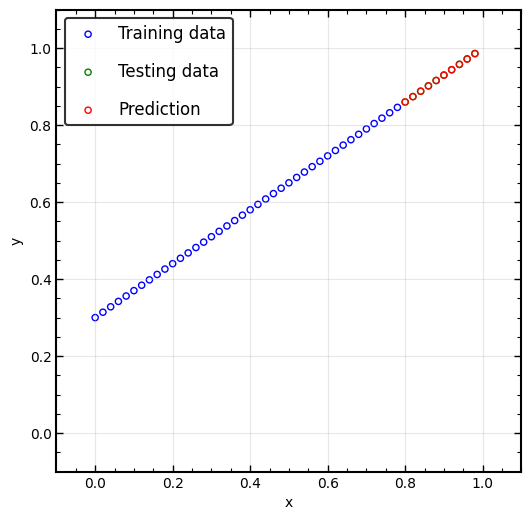

In [42]:
# Load a pytorch model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
# Put the loaded moddel to the device
loaded_model_1.to(device)
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_y_pred = loaded_model_1(X_test)
plot_predictions(predictions=loaded_model_1_y_pred.to("cpu"))